# <font color='darkblue'>Analiza utworów ze Spotify</font>
### <font color='darkblue'> Karol Michalik </font>

In [179]:
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Celem projektu jest analiza utworów muzycznych pobranych z aplikacji Spotify oraz otrzymanie rekomendacji nowych piosenek.

### Pierwszym krokiem jest import danych z aplikacji Spotify. Najpierw została zaprezentowana "ulubiona" playlista.


Analizowane zmienne:
    
    Akustyczność mierzona w skali od 0,0 do 1,0.
    
    Taneczność opisuje, jak bardzo dany utwór nadaje się tańca w oparciu o kombinację elementów muzycznych takich jak tempo, stabilność rytmu, siłę uderzenia i ogólną regularność. Dla wartości 0,0 jest najmniej taneczny, a dla 1,0 jest najbardziej taneczny.
    
    Energiczność jest miarą od 0,0 do 1,0 i stanowi percepcyjną miarę intensywności i aktywności. Zazwyczaj energiczne utwory są szybkie, głośne i hałaśliwe.
    
    Głośność wyrażona w wartościach ujemnych dB. Im wartość jest bliższa zeru tym utwór jest głośniejszy.
    
    Instrumentalność przewiduje, czy utwór nie zawiera wokalu. Im wartość instrumentalności jest bliższa 1,0, tym większe prawdopodobieństwo, że utwór nie zawiera treści wokalnej. Wartości powyżej 0,5 mają reprezentować ścieżki głównie instrumentalne.
    
    Żywość wykrywa obecność publiczności na nagraniu. Wyższe wartości żywości oznaczają zwiększone prawdopodobieństwo, że utwór został wykonany na żywo. Wartość powyżej 0,8 daje duże prawdopodobieństwo, że utwór był nagrany z udziałem publiczności.
    
    Mowa opisuje zdolność wykrywania obecności wypowiadanych słów w utworze. Im więcej słów pada w nagraniu (np. talk show, audiobook, poezja), tym wartość zmiennej jest bliższa 1,0. Wartości powyżej 0,66 opisują ścieżki, które prawdopodobnie składają się wyłącznie ze wypowiadanych słów. Wartości z zakresu od 0,33 do 0,66 opisują utwory, które mogą zawierać zarówno muzykę, jak i mowę, w sekcjach lub warstwach, w tym takie przypadki jak muzyka rap. Wartości poniżej 0,33 najprawdopodobniej reprezentują muzykę i inne utwory niezawierające słów.
    
    Ogólne szacowane tempo utworu w uderzeniach na minutę (BPM). W terminologii muzycznej tempo jest szybkością danego utworu i wywodzi się bezpośrednio ze średniego czasu trwania beatu.
    
    Wartościowość mierzona w skali od 0,0 do 1,0 opisująca muzyczną pozytywność przekazywaną przez utwór. Utwory o wysokiej wartości tej zmiennej brzmią bardziej pozytywnie (np. wesoło, euforycznie), natomiast utwory o niskiej wartości brzmią bardziej negatywnie (np. smutny, przygnębiony, zły).
    
    Na podstawie:
        https://www.theverge.com/tldr/2018/2/5/16974194/spotify-recommendation-algorithm-playlist-hack-nelson

In [180]:
cid = '604a7afa1fe24d07a3e1a172238f14f1'
secret = 'ebb78133700443689d8c62abfb543354'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [181]:
def call_playlist(creator, playlist_id): 
     

    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        
        playlist_features = {}
 
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    
        
    return playlist_df
    

### Prezentacja danych.

In [182]:
call_playlist("spotify","2Uof5MLDhkKeAANEVnFe9j")

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Pezet,"Intro (prod. Auer, cuty: DJ Panda)","Intro (prod. Auer, cuty: DJ Panda)",4PxvmHv2A1PeqKAUGdKHLf,0.747,0.782,2,-6.843,0,0.0863,0.001400,0.217,0.633,88.025,238005,4
1,DJ Shadow,Rocket Fuel (feat. De La Soul),Rocket Fuel (feat. De La Soul),3ZTRTKx8uqpzqqWOA3JyNN,0.781,0.796,1,-6.950,1,0.1110,0.219000,0.194,0.621,110.000,195667,4
2,Tymek,Milion,Milion,1QtpN8q9txVaLXc51aMNTO,0.754,0.669,0,-6.276,1,0.0449,0.000000,0.640,0.565,113.007,195398,4
3,Malik Montana,Niedostępny (prod. by Olek) (feat. DMN),Niedostępny (prod. by Olek) (feat. DMN),2pIZ5W6m2fBqWwnTEGx5mK,0.759,0.658,1,-9.185,0,0.1270,0.000023,0.109,0.398,127.873,152812,4
4,The Dead South,Good Company,In Hell I'll Be in Good Company,6Yg3gGtLuZTyZ8i4zGUaJa,0.766,0.233,7,-9.086,0,0.0487,0.001140,0.111,0.736,154.716,243187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Breakout,Blues,Kiedy byłem małym chłopcem,0FGBCrLj15yxjJ1WPRnVMQ,0.809,0.356,6,-9.921,0,0.0544,0.009370,0.112,0.870,120.860,191853,4
60,Sérgio Mendes,Timeless,Mas Que Nada,6U7GUjtamt2P0LcFod1dBT,0.747,0.928,5,-6.107,0,0.0824,0.000002,0.113,0.870,100.065,262840,4
61,Ace of Base,The Bridge,Beautiful Life,74jTexO94dFGyXGyeu8krd,0.749,0.988,0,-5.266,0,0.0387,0.006310,0.170,0.749,135.015,221187,4
62,America,America,A Horse with No Name,54eZmuggBFJbV7k248bTTt,0.654,0.506,11,-17.180,0,0.0535,0.015500,0.155,0.831,123.179,252240,4


### Wstępna analiza danych.

In [183]:
a=call_playlist("spotify","2Uof5MLDhkKeAANEVnFe9j")

In [184]:
a.describe()

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.671969,0.649703,-7.455859,0.123564,0.024428,0.169016,0.545733,120.645641
std,0.113309,0.180713,3.047878,0.104906,0.110064,0.107073,0.203254,29.567191
min,0.284000,0.144000,-18.064000,0.029500,0.000000,0.048100,0.054900,74.884000
25%,0.622000,0.550750,-8.581750,0.043850,0.000000,0.109000,0.390250,99.768000
50%,0.674500,0.685500,-6.717500,0.068100,0.000003,0.127000,0.564500,120.113000
75%,0.759250,0.743750,-5.488750,0.212250,0.000136,0.206000,0.710250,136.382000
max,0.854000,0.988000,-3.434000,0.415000,0.833000,0.640000,0.963000,191.843000


Podstawowe statystki opisowe uzyskano na podstawie analizy 64 obserwacji.

Średnia taneczność wynosi 0,67, energiczność 0,65. Minimalne wartości tych zmiennych wynosiły kolejno 0,28 i 0,14. Jedna czwarta piosenek ma taneczność nie większą niż 0,62, a energiczność 0,55. Jednocześnie 75% piosenek posiada taneczność na poziomie równym maksymalnie 0,76, a energiczność maksymalnie równą 0,74. Oznacza to, że średnio piosenki znajdujące się na tej playliście charakteryzują się całkiem wysoką tanecznością i energicznością.

Średnia głośność jest równa -7,46 dB, minimalna -18,1 dB, a maksymalna -3,43. 25% utworów ma głośność mniejszą bądź równą -8,58 , a 75% piosenek ma głośność maksymalnie na poziomie -5.49. Co oznacza, że średnio utwory z tej playlisty nie są ani bardzo głośne, ani bardzo ciche. 

Średnia zdolność do wykrywania słów plasuje się na poziomie  0,12. Najniższa zanotowana wartość dla tej zmiennej wynosi 0,03, a najwyższa jest równa 0,42. 25% utworów osiąga wartość tej zmiennej nie większą niż 0,04, a 75% piosenek nie wyższą niż 0,21. Z powyższych informacji wynika, że często słowa w piosenkach z tej playlisty są niewyraźne bądź jest ich niewiele.

Instrumentalność plasuje się średnio na poziomie 0,02. Z tabeli wynika, że najniższa wartość tej zmiennej była równa 0, a największa wynosiła 0,83. Co oznacza, że w analizowanych utworach średnio jest mało fragmentów czysto instrumentalnych. 

Średnia wartość zmiennej obrazującej udział publiczności przy nagrywaniu piosenki wynosi 0,17. Minimalnie zanotowano wartość równą 0, a maksymalnie 0,83. Możemy wywnioskować, że średnio utwory nagrywane były bez udziału publiczności, ale na playliście mogły się trafić także piosenki nagrywane z publiką.

Wartościowość średnio przyjmuje wartości równe 0,55, minimalnie 0,05, a maksymalnie 0,96. Oznacza to, że średnio atmosfera utworów jest skierowana minimalnie w pozytywnym kierunku. 

Średnie tempo analizowanych utworów wynosi 120,64 BMP, minimalnie jest równe 74,88 BMP, a maksymalnie 191,84 BMP. Oznacza to, że średnie tempo piosenek z tej playlisty jest dość szybkie. 

### Histogramy i wykresy pudełkowe dla analizowanych zmiennych.

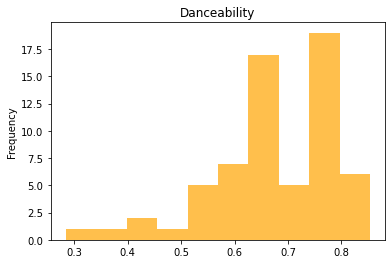

In [185]:
a['danceability'].plot.hist(color='orange',alpha=0.7,bins=10,title="Danceability")

Wykres prezentuje histogram dla zmiennej taneczność. Wynika z niego, że zdecydowanie najczęściej przyjmuje wartość powyżej 0,6 oraz poniżej 0,8.

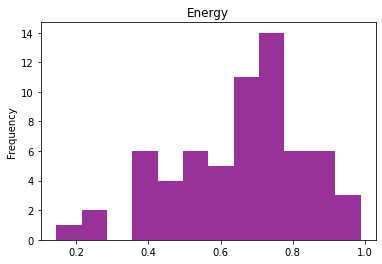

In [186]:
a['energy'].plot.hist(color='purple',alpha=0.8,bins=12,title="Energy")

Wykres prezentuje histogram dla zmiennej energiczność. Wynika z niego, że zdecydowanie najwięcej utworów posiada energiczność na poziomie między 0,6 a 0,8.



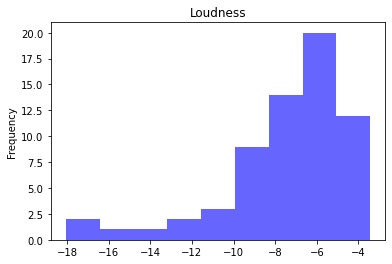

In [187]:
a['loudness'].plot.hist(color='blue',alpha=0.6,bins=9,title="Loudness")

Wykres prezentuje histogram dla zmiennej głośność. Wynika z niego, że zdecydowanie najwięcej piosenek ma głośność w okolicach -6 dB.

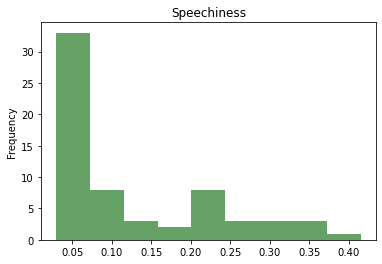

In [188]:
a['speechiness'].plot.hist(color='darkgreen',alpha=0.6,bins=9,title="Speechiness")

Wykres prezentuje histogram dla zmiennej mowa. Wynika z niego, że zdecydowanie najwięcej utworów przyjmuje tę wartość na poziomie bliskim 0,05, co oznacza, że ciężko jest w nich wyróżnić słowa.

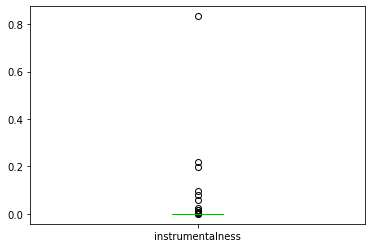

In [189]:
a['instrumentalness'].plot.box()

Wykres pudełkowy dla zmiennej instrumentalność, na którym możemy zauważyć wiele wartości odstających.

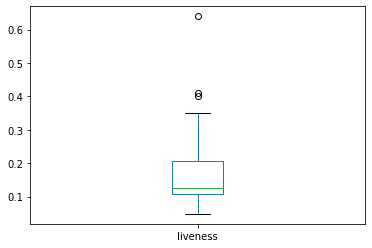

In [190]:
a['liveness'].plot.box()

Wykres pudełkowy dla zmiennej żywotność, z którego jasno wynika, że wartość wielu obserwacji plasuje się powyżej średniej. Zanotowano także 4 obserwacje odstające.

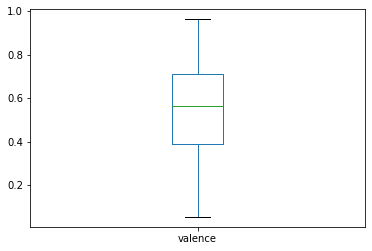

In [191]:
a['valence'].plot.box()

Wykres pudełkowy dla zmiennej wartościowość, z którego wynika, że wartości obserwacji rozkładają się prawie równomiernie.

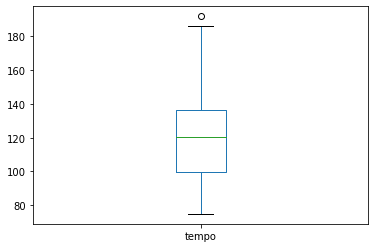

In [192]:
a['tempo'].plot.box()

Wykres pudełkowy dla zmiennej tempo. Zanotowano tylko jedną wartość odstającą. Wartość maksymalna jest znacząco dalej oddalona od mediany niż wartość minimalna.

### Kolejnym krokiem jest import playlisty z utworami, które nie są "ulubione".

In [193]:
def second_playlist(creator, playlist_id):
    
   

    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
      
        playlist_features = {}
        
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
      
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)


        
    return playlist_df

### Prezentacja danych.

In [194]:
second_playlist("spotify","37i9dQZEVXbNG2KDcFcKOF")

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Harry Styles,As It Was,As It Was,4LRPiXqCikLlN15c3yImP7,0.520,0.731,6,-5.338,0,0.0557,0.001010,0.3110,0.6620,173.930,167303,4
1,Jack Harlow,First Class,First Class,1rDQ4oMwGJI7B4tovsBOxc,0.905,0.563,8,-6.135,1,0.1020,0.000010,0.1130,0.3240,106.998,173948,4
2,Glass Animals,Dreamland (+ Bonus Levels),Heat Waves,02MWAaffLxlfxAUY7c5dvx,0.761,0.525,11,-6.900,1,0.0944,0.000007,0.0921,0.5310,80.870,238805,4
3,The Kid LAROI,F*CK LOVE 3: OVER YOU,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,0.591,0.764,1,-5.484,1,0.0483,0.000000,0.1030,0.4780,169.928,141806,4
4,Camila Cabello,Familia,Bam Bam (feat. Ed Sheeran),2DB4DdfCFMw1iaR6JaR03a,0.756,0.697,8,-6.377,1,0.0401,0.000000,0.3330,0.9560,94.996,206071,4
5,Imagine Dragons,Mercury - Act 1,Enemy (with JID) - from the series Arcane Leag...,1HhNoOuqm1a5MXYEgAFl8o,0.728,0.783,11,-4.424,0,0.2660,0.000000,0.4340,0.5550,77.011,173381,4
6,Elton John,The Lockdown Sessions,Cold Heart - PNAU Remix,6JIC3hbC28JZKZ8AlAqX8h,0.795,0.800,1,-6.320,1,0.0309,0.000073,0.0915,0.9340,116.032,202735,4
7,Lil Nas X,MONTERO,INDUSTRY BABY (feat. Jack Harlow),5Z9KJZvQzH6PFmb8SNkxuk,0.741,0.691,10,-7.395,0,0.0672,0.000000,0.0476,0.8920,150.087,212353,4
8,Anitta,Versions of Me,Envolver,3FkeNbs9Zeiqkr3WkbOiGp,0.812,0.736,4,-5.421,0,0.0833,0.002540,0.0914,0.3960,91.993,193806,4
9,Cris Mj,Una Noche en Medellín,Una Noche en Medellín,1O2pcBJGej0pmH2Y9XZMs6,0.870,0.548,10,-5.253,0,0.0770,0.000046,0.0534,0.8320,96.018,153750,4


In [195]:
b=second_playlist("spotify","37i9dQZEVXbNG2KDcFcKOF")

### Następnie tworzymy i trenujemy model.

Przyjmujemy 80% obserwacji za zbiór danych treningowych, a 20% za zbiór danych testowych.

In [196]:
from sklearn.model_selection import train_test_split
 
# oznaczamy ulubione piosenki "1"
a['liked'] = 1
 
# oznaczamu nielubiane piosenki "0"
b['liked'] = 0
  
# cały zbiór
final_playlist = a.append(b).drop_duplicates()
 
# przemieszanie zbioru
final_playlist = final_playlist.sample(frac=1).reset_index(drop=True)
 
# zostawiamy tylko numeryczne kolumny
all_tracks = final_playlist[['track_id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked']]
 
 
# podział na trening i test

X_train, X_test, y_train, y_test = train_test_split(all_tracks.drop('liked', axis=1),
                                                    all_tracks['liked'],
                                                    test_size=0.2)

### Korzystamy z algorytmu klasyfikacyjnego Random Forest.

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
 
# budujemy model i go trenujemy
model = RandomForestClassifier()
model.fit(X_train.drop('track_id', axis=1), y_train)
 
# obliczamy predykcje 
y_pred = model.predict(X_test.drop('track_id', axis=1))
 
# wizualizacja wyniku
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.75      0.80      0.77        15

    accuracy                           0.70        23
   macro avg       0.66      0.65      0.65        23
weighted avg       0.69      0.70      0.69        23



Otrzymane wyniki sugerują, że model jest średnio precyzyjny i mógłby być bardziej dokładny.

In [198]:
X_test['predicted_like'] = y_pred
 
# z przewidzianych wyników zostawiamy tylko to, co ma się potencjalnie podobać
new_tracks = X_test[X_test['predicted_like'] == 1][['track_id']]
 
# dodajemy informacje o wykonawcy i tym czy już była polubiona
new_tracks = new_tracks.merge(final_playlist, how='inner', on='track_id')
 
# usuwamy to co już było polubione
new_tracks = new_tracks[new_tracks['liked'] == 0]
 
# zostawiamy tylko potrzebne kolumny
new_tracks = new_tracks[['artist', 'track_name', 'album', 'track_id']]
 
# wizualizacja wyniku
print(new_tracks)

               artist                                         track_name  \
0     Imagine Dragons  Enemy (with JID) - from the series Arcane Leag...   
4   The Neighbourhood                                    Sweater Weather   
7         The Walters                                      I Love You So   
13       Harry Styles                                          As It Was   

              album                track_id  
0   Mercury - Act 1  1HhNoOuqm1a5MXYEgAFl8o  
4       I Love You.  2QjOHCTQ1Jl3zawyYOpxh6  
7     I Love You So  4SqWKzw0CbA05TGszDgMlc  
13        As It Was  4LRPiXqCikLlN15c3yImP7  


Z drugiej playlisty zostały polecone cztery piosenki: Enemy, Sweater Weather, I Love You So i As It Was.

### Algorytm wykrywania anomalii.

In [199]:
from sklearn.ensemble import IsolationForest

In [200]:
forest = IsolationForest(max_samples=64, contamination=0.2)

In [201]:
d = a[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']]

In [202]:
forest.fit(d)

C:\Users\karol\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.2, max_samples=64)

In [203]:
np.set_printoptions(suppress=True)
forest.predict(d)

array([ 1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1])

Algorytm wyłonił 13 utworów, które uznał za odstające, co jest wysoką wartością i stanowi ponad 20% wszystkich piosenek.

Za pomocą metody score samples została pokazana szansa na to, że dana obserwacja nie jest anomalią, oraz przedstawiono rozkład tych wartości na histogramie.

In [204]:
score = forest.score_samples(d)

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2., 1., 1., 3., 2.,
        4., 3., 4., 3., 5., 3., 8., 4., 9., 2., 6., 1., 1.]),
 array([-0.64843438, -0.63947567, -0.63051697, -0.62155826, -0.61259955,
        -0.60364084, -0.59468214, -0.58572343, -0.57676472, -0.56780602,
        -0.55884731, -0.5498886 , -0.5409299 , -0.53197119, -0.52301248,
        -0.51405377, -0.50509507, -0.49613636, -0.48717765, -0.47821895,
        -0.46926024, -0.46030153, -0.45134282, -0.44238412, -0.43342541,
        -0.4244667 , -0.415508  , -0.40654929, -0.39759058, -0.38863187,
        -0.37967317]),
 <a list of 30 Patch objects>)

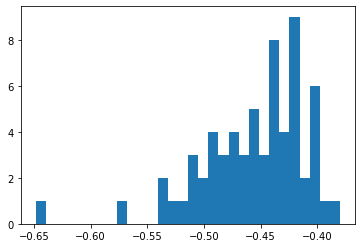

In [205]:
plt.hist(score, bins=30)